<br>
<u>Notebook Seven</u> | 
<a href=https://leone.gdn/NLP target=_blank>Report</a> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Ensemble Methods</b><br><br>
Andrea Leone<br>
ML for NLP — University of Trento<br>
January 2022
<hr><br><br>

In [1]:
import project 

import numpy   as np
import xgboost as xgb
import sklearn
import sklearn.tree
import sklearn.ensemble

project.notebook()

In [2]:
records = project.sql_query(""" 
    SELECT vector, category FROM talks
    WHERE  vector IS NOT NULL
    ORDER BY slug ASC;
"""); pruning_method = 'IF'

records = project.prune_outliers(records, pruning_method)

(x, y), (z, t)                       \
    = train_set, test_set            \
    = splits                         \
    = project.split_in_sets( records )

project.describe_sets(splits)

Data reduced from 4710 to 4456 (-5.39%).

train_set  =>  (0, 1383) (1, 1556) (2, 1061) 
test_set   =>  (0,  156) (1,  193) (2,  107) 


<br/>

### eXtreme Gradient Boosting Classifier

[XGBoost](https://github.com/dmlc/xgboost) is an [award-winning](https://github.com/dmlc/xgboost/tree/master/demo#machine-learning-challenge-winning-solutions) regularizing gradient boosting framework that includes proportional leaf shrinking, automatic feature selection, and parallelised distributed computing. This implementation is set for multiclass classification using the softmax objective, outputting the predicted probability of each data point belonging to each class.

In [3]:
xgbc = xgb.XGBClassifier( 
    objective='multi:softprob', eval_metric='rmse',
    sampling_method='gradient_based', num_parallel_tree=2
).fit(np.array(x), np.array(y))

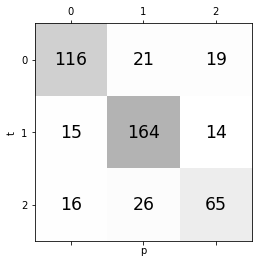

accuracy    0.756578947368421
precision   0.7432107124050251
recall      0.7336024372487499


In [4]:
p = xgbc.predict(np.array(z)) 

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — XGBC<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .74225352 .73888784 .73142552  193 216 118
en_core_web_lg   .74126984 .73736670 .73244905  179 179 109  without outliers (pm=LOF)
en_core_web_lg   .75657894 .74321071 .73360243  116 164  65  without outliers (pm=IF)

en_core_web_trf  .62905500 .61890454 .60664763  182 197  67
en_core_web_trf  .63758389 .61466636 .60319474  129 195  56  without outliers (pm=LOF)
en_core_web_trf  .65838509 .63576423 .62916671   72 105  35  without outliers (pm=IF)

</pre>

<br/>

### Decision Trees Classifier

In [5]:
dtc = sklearn.tree.DecisionTreeClassifier ( 
    criterion='entropy', splitter='best',
    max_depth=None, min_samples_split=3,
    ccp_alpha=0.0, random_state=42,
    class_weight=project.class_weights(y)
).fit(x,y)

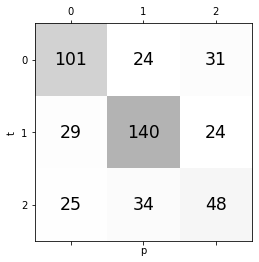

accuracy    0.6337719298245614
precision   0.6082343425907472
recall      0.6071408764377628


In [6]:
p = dtc.predict(z) 

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — DTC<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .56478873 .55439725 .55301604  147 171  83
en_core_web_lg   .58412698 .57744174 .57580514  132 153  83  without outliers (pm=LOF)
en_core_web_lg   .63377192 .60823434 .60714087  101 140  48  without outliers (pm=IF)

en_core_web_trf  .45839210 .44928940 .44936768  135 122  68
en_core_web_trf  .44295302 .42325117 .42290729   87 133  44  without outliers (pm=LOF)
en_core_web_trf  .43788819 .42152348 .42188823   48  68  25  without outliers (pm=IF)

</pre>

<br/>

### Random Forest Classifier

The goal of **ensemble methods** is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalisability / robustness over a single estimator.

In [7]:
rfc = sklearn.ensemble.RandomForestClassifier ( 
    n_estimators=400, criterion='entropy',
    max_depth=None, min_samples_split=3,
    ccp_alpha=0.0, random_state=42, bootstrap=True,
    class_weight=project.class_weights(y)
).fit(x,y)

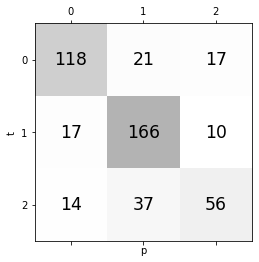

accuracy    0.7456140350877193
precision   0.7359055108256612
recall      0.71329278977819


In [8]:
p = rfc.predict(z) 

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — RFC<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .71971830 .71761997 .70200640  186 224 101
en_core_web_lg   .72222222 .72061624 .70609495  179 185  91  without outliers (pm=LOF)
en_core_web_lg   .74561403 .73590551 .71329278  118 166  56  without outliers (pm=IF)

en_core_web_trf  .62764456 .63577654 .60276742  180 205  60
en_core_web_trf  .58053691 .56517999 .53353591  121 192  33  without outliers (pm=LOF)
en_core_web_trf  .61801242 .58141088 .56230695   75 108  16  without outliers (pm=IF)

</pre>

<br>